Theoretical



1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that aims to improve the accuracy of weak learners (models that perform slightly better than random guessing) by combining them sequentially. Each subsequent model in the sequence focuses on correcting the errors made by the previous ones.

2. How does Boosting differ from Bagging?

The key difference lies in how the models are combined. In Bagging (like Random Forests), models are built independently and in parallel, with each model trained on a bootstrap sample of the data. In Boosting, models are built sequentially, with each new model attempting to correct the errors of the previous ones. Boosting is often more prone to overfitting than Bagging.

3. What is the key idea behind AdaBoost?

The key idea behind AdaBoost (Adaptive Boosting) is to assign weights to the training instances. Initially, all instances have equal weights. After training a weak learner, the weights of misclassified instances are increased, and the weights of correctly classified instances are decreased. This forces the next weak learner to focus more on the instances that were difficult to classify by the previous models.

4. Explain the working of AdaBoost with an example

Imagine you have a dataset of emails to classify as spam or not spam. AdaBoost would work as follows:

* **Step 1:** Train a weak classifier (e.g., a simple decision stump) on the initial dataset.
* **Step 2:** Identify the misclassified emails. Increase their weights so that the next classifier pays more attention to them. Decrease the weights of correctly classified emails.
* **Step 3:** Train a new weak classifier on the dataset with the updated weights. This classifier will be better at classifying the emails that were misclassified by the first classifier.
* **Step 4:** Repeat steps 2 and 3 for a predetermined number of iterations or until a desired accuracy is reached.
* **Step 5:** The final prediction is a weighted sum of the predictions of all the weak classifiers, where the weight of each classifier depends on its accuracy.

5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting is another boosting technique that builds models sequentially. However, instead of adjusting instance weights like AdaBoost, Gradient Boosting trains each new model to predict the *residual errors* (the difference between the actual value and the predicted value) of the previous model. The goal is to minimize a loss function by iteratively adding new models that reduce the residuals.

The main difference is that AdaBoost focuses on re-weighting misclassified instances, while Gradient Boosting focuses on reducing the errors (residuals) made by the previous models.

6. What is the loss function in Gradient Boosting?

The loss function in Gradient Boosting measures how well the model is performing. Common loss functions include:

* **Mean Squared Error (MSE):** For regression tasks.
* **Log-loss (Cross-Entropy):** For classification tasks.
* **Huber loss and Quantile loss:** For robust regression.

The Gradient Boosting algorithm tries to minimize this loss function by iteratively adding models that move the predictions closer to the true values.

7. How does XGBoost improve over traditional Gradient Boosting?

XGBoost (Extreme Gradient Boosting) is an optimized and scalable implementation of Gradient Boosting. It improves over traditional Gradient Boosting in several ways:

* **Regularization:** Includes L1 and L2 regularization to prevent overfitting.
* **Handling Missing Values:** Has a built-in mechanism to handle missing values.
* **Parallel Processing:** Can train models in parallel for faster computation.
* **Tree Pruning:** Uses a more sophisticated tree pruning algorithm.
* **Customizable Objective Functions:** Allows users to define custom objective functions and evaluation metrics.

8. What is the difference between XGBoost and CatBoost?

Both XGBoost and CatBoost are popular gradient boosting algorithms. Key differences include:

* **Categorical Feature Handling:** CatBoost is specifically designed to handle categorical features efficiently without requiring extensive preprocessing like one-hot encoding. It uses a technique called "ordered boosting" and "permutation-aware" training. XGBoost requires categorical features to be preprocessed (e.g., one-hot encoded or label encoded).
* **Prediction Time:** CatBoost is generally faster for prediction than XGBoost.
* **Default Parameters:** CatBoost has more robust default parameters, making it easier to use out-of-the-box.
* **Tree Construction:** CatBoost uses symmetric trees by default, while XGBoost uses asymmetric trees.

9. What are some real-world applications of Boosting techniques?

Boosting techniques are widely used in various real-world applications, including:

* **Spam detection:** Classifying emails as spam or not spam.
* **Image recognition:** Identifying objects in images.
* **Fraud detection:** Detecting fraudulent transactions.
* **Customer churn prediction:** Predicting which customers are likely to leave.
* **Search ranking:** Ranking search results in search engines.
* **Medical diagnosis:** Assisting in diagnosing diseases.

10. How does regularization help in XGBoost?

Regularization in XGBoost (L1 and L2) helps to prevent overfitting by adding a penalty term to the loss function based on the complexity of the model. This encourages the model to learn simpler relationships and avoid fitting the noise in the data. L1 regularization encourages sparsity (setting some weights to zero), while L2 regularization encourages smaller weights.

11. What are some hyperparameters to tune in Gradient Boosting models?

Several hyperparameters can be tuned to optimize the performance of Gradient Boosting models. Some important ones include:

* **n_estimators (or num_boost_round):** The number of boosting rounds (number of trees).
* **learning_rate (or eta):** Controls the step size at each iteration. A smaller learning rate requires more estimators.
* **max_depth:** The maximum depth of each tree.
* **min_child_weight:** The minimum sum of weights of instances required in a child node.
* **gamma (or min_split_loss):** The minimum loss reduction required to make a split.
* **subsample:** The fraction of training instances used for each tree.
* **colsample_bytree:** The fraction of features used for each tree.
* **reg_alpha (L1 regularization) and reg_lambda (L2 regularization):** Regularization parameters in XGBoost.

12. What is the concept of Feature Importance in Boosting?

Feature importance in Boosting refers to how much each feature contributes to the model's predictions. Different methods can be used to calculate feature importance, such as:

* **Gain:** The total gain reduction (improvement in the loss function) achieved by splits on a particular feature across all trees.
* **Cover:** The number of instances affected by splits on a feature.
* **Frequency:** The number of times a feature is used in splits across all trees.

Understanding feature importance helps in feature selection, model interpretation, and gaining insights into the data.

13. Why is CatBoost efficient for categorical data?

CatBoost is efficient for categorical data due to its unique handling of categorical features:

* **Ordered Boosting:** It uses an ordered boosting scheme where trees are built on different permutations of the training data, which helps to mitigate prediction shift caused by using categorical features.
* **Permutation-aware training:** It uses a special method to calculate the splits for categorical features that considers the relationship between the feature and the target variable while avoiding target leakage.
* **One-hot encoding is not required:** CatBoost can handle categorical features directly without requiring explicit one-hot encoding, which can be computationally expensive for high-cardinality categorical features.

Practical


14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Classifier
# Using a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
adaboost_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.8350


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Regressor
# Using a Decision Tree as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)
adaboost_reg = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
adaboost_reg.fit(X_train, y_train) # Corrected from y_test to y_train

# Predict on the test set
y_pred = adaboost_reg.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"AdaBoost Regressor MAE: {mae:.4f}")

AdaBoost Regressor MAE: 102.6205


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Get feature importance
feature_importance = gb_clf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort feature importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print feature importance
print("Gradient Boosting Classifier Feature Importance:")
print(sorted_feature_importance)

Gradient Boosting Classifier Feature Importance:
mean concave points        0.450528
worst concave points       0.240103
worst radius               0.075589
worst perimeter            0.051408
worst texture              0.039886
worst area                 0.038245
mean texture               0.027805
worst concavity            0.018725
concavity error            0.013068
area error                 0.008415
radius error               0.006870
worst smoothness           0.004811
fractal dimension error    0.004224
texture error              0.003604
mean compactness           0.002996
compactness error          0.002511
mean smoothness            0.002467
concave points error       0.002038
worst symmetry             0.001478
perimeter error            0.001157
mean concavity             0.000922
symmetry error             0.000703
smoothness error           0.000556
mean symmetry              0.000520
worst compactness          0.000450
mean area                  0.000425
mean perimeter 

17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_reg.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.8260


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [5]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")

# Create and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")

XGBoost Classifier Accuracy: 0.9200
Gradient Boosting Classifier Accuracy: 0.9100


19. Train a CatBoost Classifier and evaluate using F1-Score

In [19]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)

# Train the model
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_clf.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1:.4f}")

CatBoost Classifier F1-Score: 0.8571


20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [7]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor MSE: {mse:.4f}")

XGBoost Regressor MSE: 9705.6481


21. Train an AdaBoost Classifier and visualize feature importance

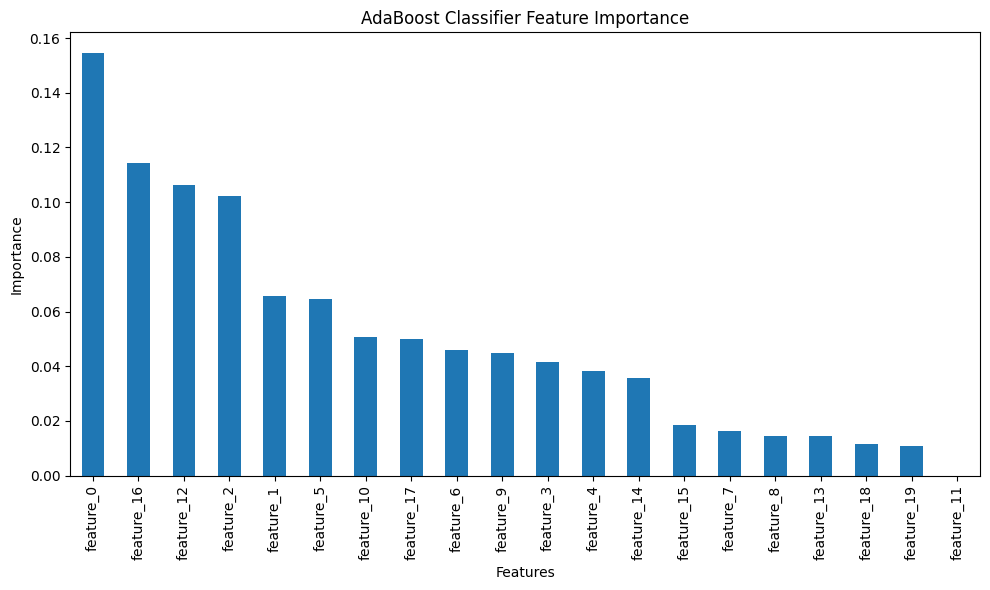

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])] # Generate feature names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
adaboost_clf.fit(X_train, y_train)

# Get feature importance
feature_importance = adaboost_clf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort feature importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title("AdaBoost Classifier Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

22. Train a Gradient Boosting Regressor and plot learning curves

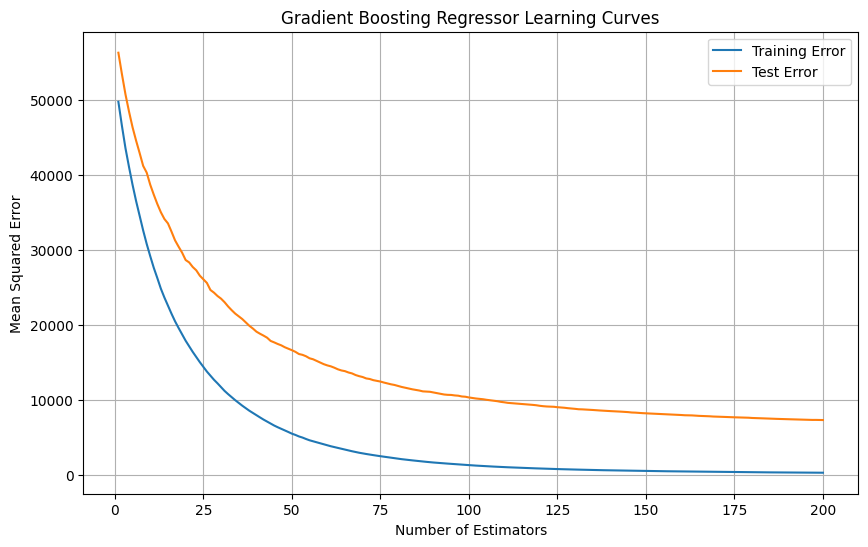

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model and record the error at each stage
gb_reg.fit(X_train, y_train)

# Calculate the cumulative training and test error
train_errors = []
test_errors = []
for i, y_pred in enumerate(gb_reg.staged_predict(X_train)):
    train_errors.append(mean_squared_error(y_train, y_pred))
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_errors.append(mean_squared_error(y_test, y_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_errors)) + 1, train_errors, label='Training Error')
plt.plot(np.arange(len(test_errors)) + 1, test_errors, label='Test Error')
plt.title("Gradient Boosting Regressor Learning Curves")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

23. Train an XGBoost Classifier and visualize feature importance

<Figure size 1000x600 with 0 Axes>

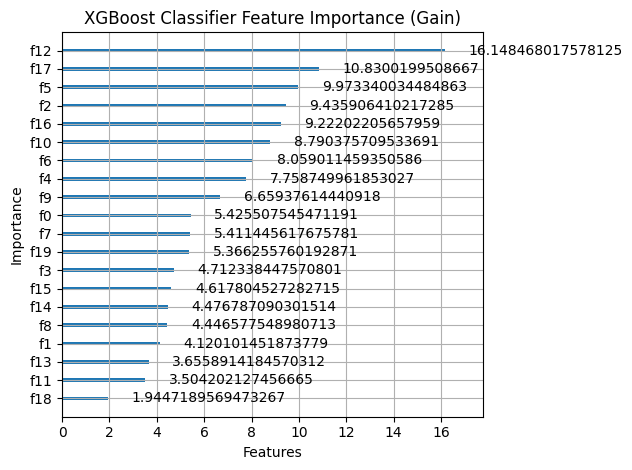

In [10]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, importance_type='gain') # You can also use 'weight' or 'cover'
plt.title("XGBoost Classifier Feature Importance (Gain)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

24. Train a CatBoost Classifier and plot the confusion matrix

<Figure size 800x600 with 0 Axes>

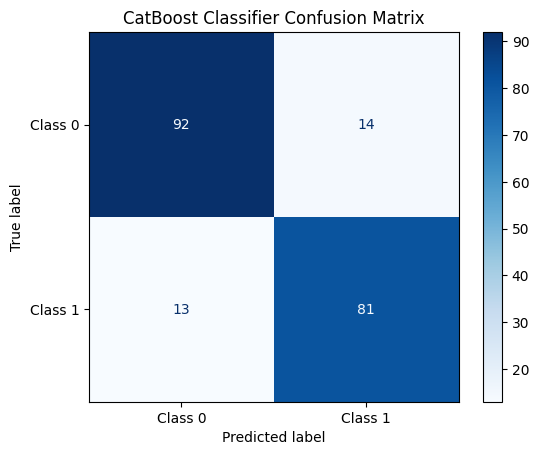

In [20]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)

# Train the model
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()

25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

AdaBoost with 10 estimators Accuracy: 0.7900
AdaBoost with 50 estimators Accuracy: 0.8200
AdaBoost with 100 estimators Accuracy: 0.8350
AdaBoost with 200 estimators Accuracy: 0.8300
AdaBoost with 500 estimators Accuracy: 0.8350


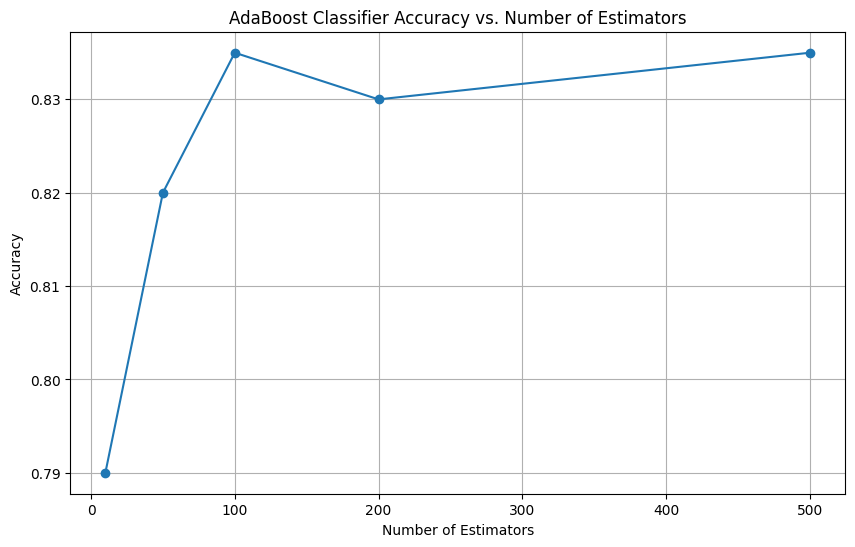

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_estimators to test
n_estimators_range = [10, 50, 100, 200, 500]
accuracies = []

# Train AdaBoost with different n_estimators
for n in n_estimators_range:
    base_estimator = DecisionTreeClassifier(max_depth=1)
    adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=n, random_state=42)
    adaboost_clf.fit(X_train, y_train)
    y_pred = adaboost_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"AdaBoost with {n} estimators Accuracy: {accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

26. Train a Gradient Boosting Classifier and visualize the ROC curve

<Figure size 800x600 with 0 Axes>

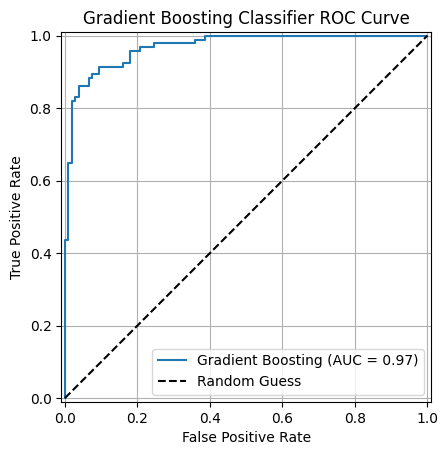

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Get the probability of the positive class
y_prob = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting')
roc_display.plot()
plt.title('Gradient Boosting Classifier ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [14]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)

# Define the parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_ # Convert negative MSE to positive

print(f"Best parameters found: {best_params}")
print(f"Best Mean Squared Error (from GridSearchCV): {best_score:.4f}")

# Evaluate on the test set with the best estimator
best_xgb_reg = grid_search.best_estimator_
y_pred = best_xgb_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set with best estimator: {test_mse:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'learning_rate': 0.2}
Best Mean Squared Error (from GridSearchCV): 7929.4427
Mean Squared Error on Test Set with best estimator: 7610.3280


28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

In [21]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter

# Generate an imbalanced sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                           weights=[0.9, 0.1], flip_y=0.01, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain imbalance ratio

# Check class distribution
print("Training data class distribution:", Counter(y_train))
print("Testing data class distribution:", Counter(y_test))

# --- Train CatBoost without class weighting ---
print("\nTraining CatBoost without class weighting...")
cat_clf_no_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)
cat_clf_no_weights.fit(X_train, y_train)
y_pred_no_weights = cat_clf_no_weights.predict(X_test)
f1_no_weights = f1_score(y_test, y_pred_no_weights)
print(f"CatBoost Classifier (No Weights) F1-Score: {f1_no_weights:.4f}")

# --- Train CatBoost with class weighting ---
print("\nTraining CatBoost with class weighting...")
# Calculate class weights
class_counts = Counter(y_train)
total_count = sum(class_counts.values())
class_weights = {cls: total_count / count for cls, count in class_counts.items()}
print("Calculated Class Weights:", class_weights)

cat_clf_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0,
                                     class_weights=class_weights) # Apply class weights
cat_clf_weights.fit(X_train, y_train)
y_pred_weights = cat_clf_weights.predict(X_test)
f1_weights = f1_score(y_test, y_pred_weights)
print(f"CatBoost Classifier (With Weights) F1-Score: {f1_weights:.4f}")

# Compare F1-scores
print("\nComparison:")
print(f"F1-Score without weighting: {f1_no_weights:.4f}")
print(f"F1-Score with weighting:    {f1_weights:.4f}")

Training data class distribution: Counter({np.int64(0): 718, np.int64(1): 82})
Testing data class distribution: Counter({np.int64(0): 180, np.int64(1): 20})

Training CatBoost without class weighting...
CatBoost Classifier (No Weights) F1-Score: 0.3333

Training CatBoost with class weighting...
Calculated Class Weights: {np.int64(0): 1.1142061281337048, np.int64(1): 9.75609756097561}
CatBoost Classifier (With Weights) F1-Score: 0.6222

Comparison:
F1-Score without weighting: 0.3333
F1-Score with weighting:    0.6222


29. Train an AdaBoost Classifier and analyze the effect of different learning rates

AdaBoost with learning_rate=0.01 Accuracy: 0.7300
AdaBoost with learning_rate=0.1 Accuracy: 0.8100
AdaBoost with learning_rate=0.5 Accuracy: 0.8100
AdaBoost with learning_rate=1.0 Accuracy: 0.8350
AdaBoost with learning_rate=2.0 Accuracy: 0.3300


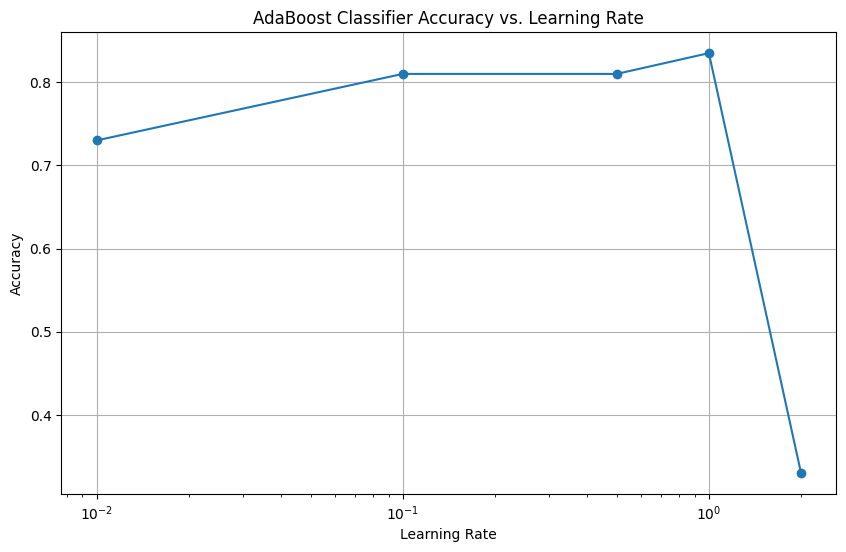

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of learning rates to test
learning_rates = [0.01, 0.1, 0.5, 1.0, 2.0]
accuracies = []

# Train AdaBoost with different learning rates
for lr in learning_rates:
    base_estimator = DecisionTreeClassifier(max_depth=1)
    adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=lr, random_state=42)
    adaboost_clf.fit(X_train, y_train)
    y_pred = adaboost_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"AdaBoost with learning_rate={lr} Accuracy: {accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xscale('log') # Use log scale for learning rate
plt.grid(True)
plt.show()

30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [17]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

# Generate a sample multi-class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier for multi-class
# 'objective' is set to 'multi:softprob' to get class probabilities
# 'num_class' is set to the number of classes
xgb_clf_multi = xgb.XGBClassifier(objective='multi:softprob', num_class=3,
                                  n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_clf_multi.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_prob = xgb_clf_multi.predict_proba(X_test)

# Calculate log-loss
# Ensure y_test is one-hot encoded or use integer labels directly with log_loss
# For integer labels, log_loss works directly with predict_proba output
logloss = log_loss(y_test, y_prob)
print(f"XGBoost Classifier Multi-class Log-Loss: {logloss:.4f}")

XGBoost Classifier Multi-class Log-Loss: 0.2266


In [18]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00
